In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np
import warnings
warnings.filterwarnings('ignore')

db= mysql.connector.connect(host="localhost",username="root",password="sameer@123khan",database="ecommerce")
cur=db.cursor()


# 1. List the top 10 total number of orders placed by customer according to state. 

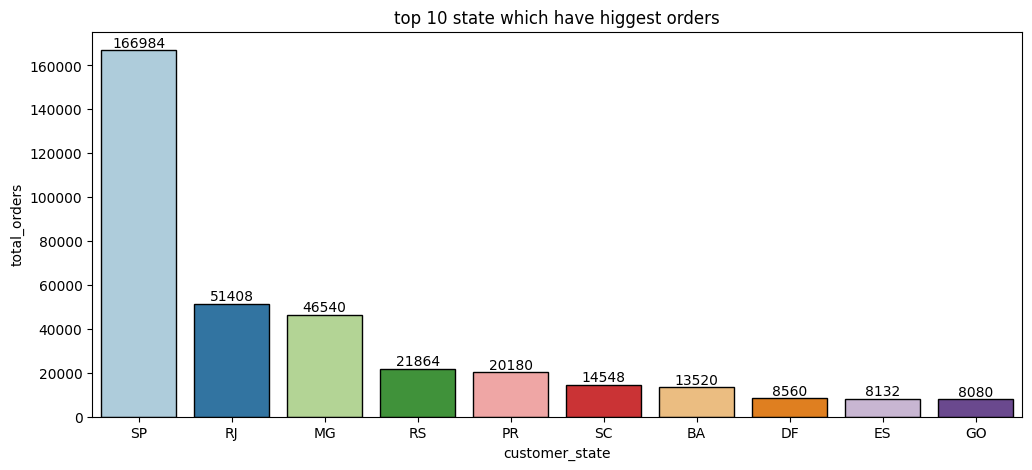

In [2]:
query="""select count(order_id) as total_orders ,c.customer_state from customers c join orders o on c.customer_id=o.customer_id 
group by c.customer_state order by total_orders desc limit 10;"""

cur.execute(query)
data=cur.fetchall()

df=pd.DataFrame(data,columns=['total_orders','customer_state'])

plt.figure(figsize=(12,5))
ax=sns.barplot(x='customer_state',y='total_orders',data=df,palette='Paired',edgecolor="black")
for bar in ax.containers:
    ax.bar_label(bar)

plt.title("top 10 state which have higgest orders")
plt.show()

### from above chart we observe that most of the orders are comming from SP state.

# 2. Count the number of orders placed in 2017.

In [3]:
query="""select count(order_id) from orders where  year(order_purchase_timestamp)=2017"""
cur.execute(query)
data=cur.fetchall()
print("total order placed in 2017 are=",data[0][0])

total order placed in 2017 are= 90202


# 3. Find the total sales per category.

               category        sales
0        bed table bath  13700429.37
1         HEALTH BEAUTY  13258984.96
2  computer accessories  12682643.57
3  Furniture Decoration  11441411.13
4       Watches present  11433733.43


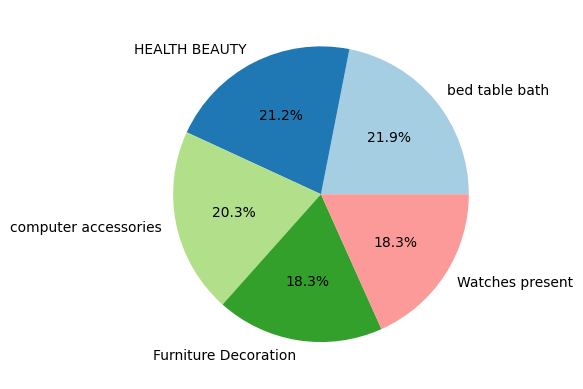

In [4]:
query="""select products.product_category category,round(sum(payments.payment_value),2) sales from products join order_items
on products.product_id=order_items.product_id join payments 
on payments.order_id=order_items.order_id group by category order by sales desc limit 5"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["category","sales"])
print(df)
plt.pie(df["sales"],labels=df["category"],colors=sns.color_palette('Paired'),autopct='%1.1f%%')
plt.show()

### from the above chart we observe that mostly we generate revenue from bed table bath, health beauty and computer accessories.

# 4. Calculate the percentage of orders that were paid in installments.

In [5]:
query="""select (sum(case when payment_installments >1 then 1 else 0 end)) /count(*)*100 from payments; """
cur.execute(query)
data=cur.fetchall()
print("percentage of order in paid in installments is=",data)

percentage of order in paid in installments is= [(Decimal('49.4176'),)]


# 5. find average price of each state and city where avg should be greater than 650 and show pie chart.

  state        city  avg_price
0    SP      bofete    3133.32
1    SP    londrina    1455.00
2    PR  california    1271.67
3    PR   paincandu    1135.61
4    PB  mamanguape     898.04


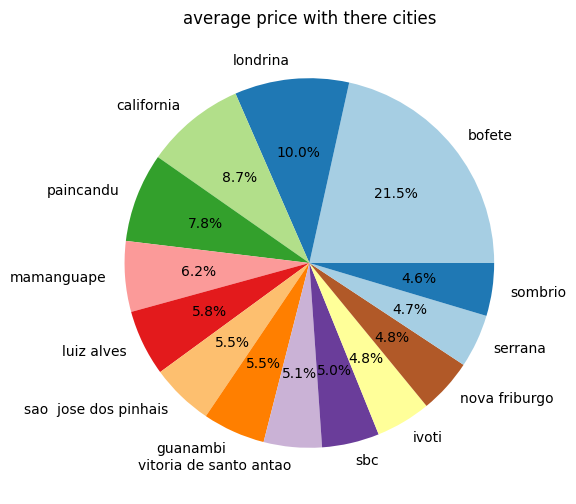

In [6]:
query="""select sellers.seller_state,sellers.seller_city,round(avg(order_items.price),2) as average from order_items,sellers 
where order_items.seller_id=sellers.seller_id group by sellers.seller_state,sellers.seller_city having average>650 order by average desc"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["state","city","avg_price"])
print(df.head(5))
plt.figure(figsize=(11,6))
plt.pie(df["avg_price"],labels=df["city"],colors=sns.color_palette('Paired'),autopct='%1.1f%%')
plt.xticks(rotation=90)
plt.title("average price with there cities")
plt.show()
                

# 6. Count the number of customers from each state and show in charts. 

   states  total no count
0      SP           83492
1      RJ           25704
2      MG           23270
3      RS           10932
4      PR           10090
5      SC            7274
6      BA            6760
7      DF            4280
8      ES            4066
9      GO            4040
10     PE            3304
11     CE            2672
12     PA            1950
13     MT            1814
14     MA            1494
15     MS            1430
16     PB            1072
17     PI             990
18     RN             970
19     AL             826
20     SE             700
21     TO             560
22     RO             506
23     AM             296
24     AC             162
25     AP             136
26     RR              92


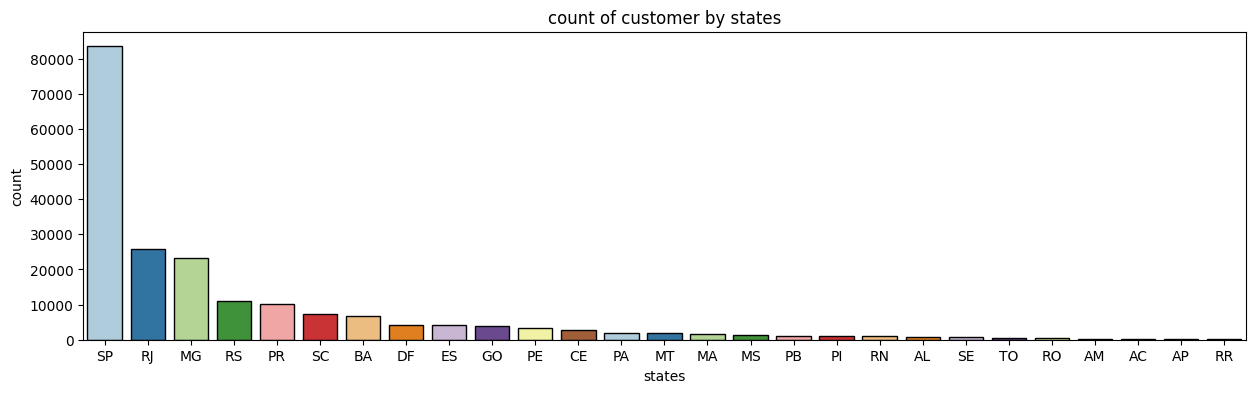

In [7]:
query="""select customer_state,count(*) as total_count from customers group by customer_state order by total_count desc"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["states","total no count"])
print(df)
plt.figure(figsize=(15,4))
sns.barplot(x='states',y='total no count',data=df,palette='Paired',edgecolor="black");
plt.xlabel("states")
plt.ylabel("count")
plt.title("count of customer by states")
plt.show()

### from above chart we observe that most of the customers are from SP state.

# 7.fetch the data and compare the sep and oct sales of each day and show in graph 

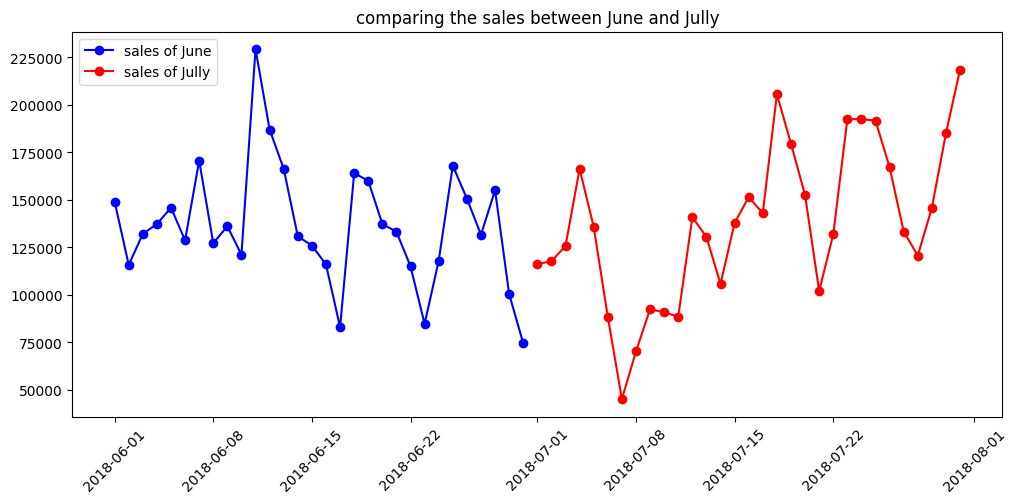

In [8]:
query1="""select date(orders.order_purchase_timestamp) as datee ,round(sum(payments.payment_value),2) as payment from orders 
join payments on orders.order_id=payments.order_id where year(orders.order_purchase_timestamp)=2018 and month(orders.order_purchase_timestamp)=6
group by date(orders.order_purchase_timestamp) order by datee asc"""
cur.execute(query1)
data1=cur.fetchall()

query2="""select date(orders.order_purchase_timestamp) as datee ,round(sum(payments.payment_value),2) as payment from orders 
join payments on orders.order_id=payments.order_id where year(orders.order_purchase_timestamp)=2018 and month(orders.order_purchase_timestamp)=7
group by date(orders.order_purchase_timestamp) order by datee asc"""
cur.execute(query2)
data2=cur.fetchall()

df1=pd.DataFrame(data1,columns=["date","sales"])
df2=pd.DataFrame(data2,columns=["date","sales"]) 

plt.figure(figsize=(12,5))
plt.xticks(rotation=45)
plt.plot(df1["date"],df1["sales"],color="blue",label="sales of June",marker="o")
plt.plot(df2["date"],df2["sales"],color="red",label="sales of Jully",marker="o")
plt.legend()
plt.title("comparing the sales between June and Jully")
plt.show()

### from the above chart we compare the sales of june 2018 and july 2018.

# 8. Calculate the number of orders per month in 2018 show chart .

      months  count
0       July  12584
1     August  13024
2   February  13456
3       June  12334
4      March  14422
5    January  14538
6        May  13746
7      April  13878
8  September     32
9    October      8


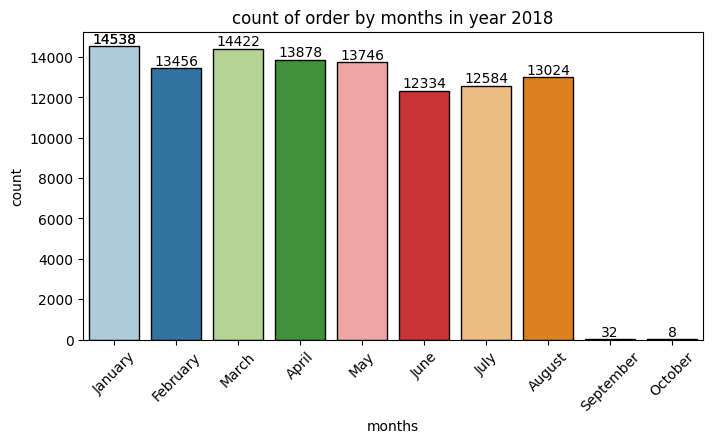

In [9]:
query="""select monthname(order_purchase_timestamp) months ,count(*)  total_count from orders where year(order_purchase_timestamp)=2018 group by months """
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["months","count"])
print(df)
o=["January","February","March","April","May","June","July","August","September","October"]

plt.figure(figsize=(8,4))
ax=sns.barplot(x=df["months"],y=df["count"],data=df,order=o,edgecolor="black",palette='Paired')
for bar in ax.containers:
    ax.bar_label(bar)
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.title("count of order by months in year 2018")
plt.show()

### from the above chart we analyse that in which month of 2018 we get most orders.

# 9. Find the average number of products per order, grouped by customer city.

In [10]:
query="""with count_per_order as (select orders.order_id,orders.customer_id,count(order_items.order_id)as oc from orders join order_items
on orders.order_id=order_items.order_id
group by orders.order_id,orders.customer_id)

select customers.customer_city,avg(count_per_order.oc) average
from customers join count_per_order 
on customers.customer_id=count_per_order.customer_id
group by customers.customer_city order by average"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["cities","average"])
df

,cities,average
0,ulianopolis,4.0000
1,adustina,4.0000
2,abatia,4.0000
3,pontalinda,4.0000
4,capitao andrade,4.0000
...,...,...
4105,matias olimpio,20.0000
4106,candido godoi,24.0000
4107,datas,24.0000
4108,celso ramos,26.0000


# 10. Calculate the percentage of total revenue contributed by each product category.

In [11]:
query="""select products.product_category category,
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2)sales 
from products join order_items
on products.product_id=order_items.product_id  
join payments 
on payments.order_id=order_items.order_id 
group by category order by sales desc"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["category","sales%"])
df.head()

,category,sales%
0,bed table bath,42.79
1,HEALTH BEAUTY,41.41
2,computer accessories,39.61
3,Furniture Decoration,35.73
4,Watches present,35.71


# 11. Identify the correlation between product price and the number of times a product has been purchased.

In [12]:
query="""select products.product_category,count(order_items.product_id),round(avg(order_items.price),2)from 
products join order_items on products.product_id=order_items.product_id
group by products.product_category """
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["category","order_count","price"])


arr1=df["order_count"]
arr2=df["price"]

a=np.corrcoef([arr1,arr2])
print("the correlation between price and number of times a product has been purchased is=",a[0][1])

the correlation between price and number of times a product has been purchased is= -0.1063151416715757


# 12. Calculate the total revenue generated by each seller, and rank them by revenue and chart of top 10.


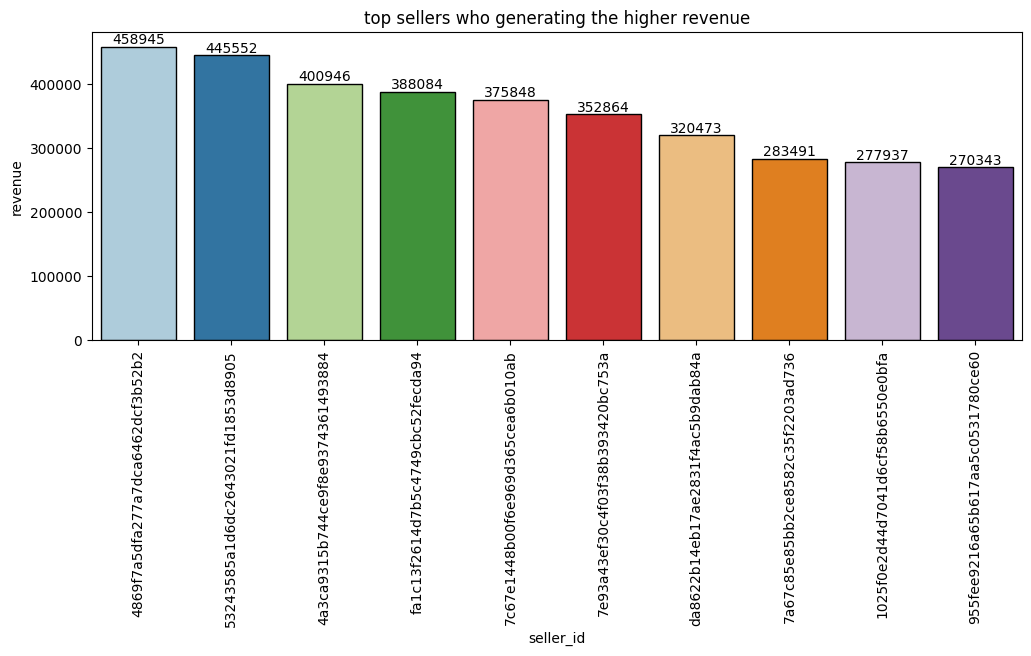

In [13]:
query="""select *,dense_rank() over(order by revenue desc) as rn from
(select seller_id,round(sum(price),2) as revenue from order_items group by seller_id) as a"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["seller_id","revenue","rank"])
df=df.head(10)

plt.figure(figsize=(12,4))
plt.xticks(rotation=90)

ax=sns.barplot(x="seller_id",y="revenue",data=df,edgecolor="black",palette="Paired")
for bar in ax.containers:
    ax.bar_label(bar)

plt.title("top sellers who generating the higher revenue")
plt.show()


### from the above chart we obresve that which seller is generating the higher revenue.

# 13. Calculate the year-over-year growth rate of total sales.

In [14]:
query="""with a as(select year(orders.order_purchase_timestamp) as years,round(sum(payments.payment_value),2) as payment from orders 
join payments on orders.order_id=payments.order_id
group by years order by years)

select years,((payment-lag(payment,1) over(order by years))/lag(payment,1) over(order by years)) * 100  from a"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["years","growth_%"])
df

,years,growth_%
0,2016,NaN
1,2017,12112.703757
2,2018,20.000924


# 14. Identify the top 3 customers who spent the most money in each year and show chart.

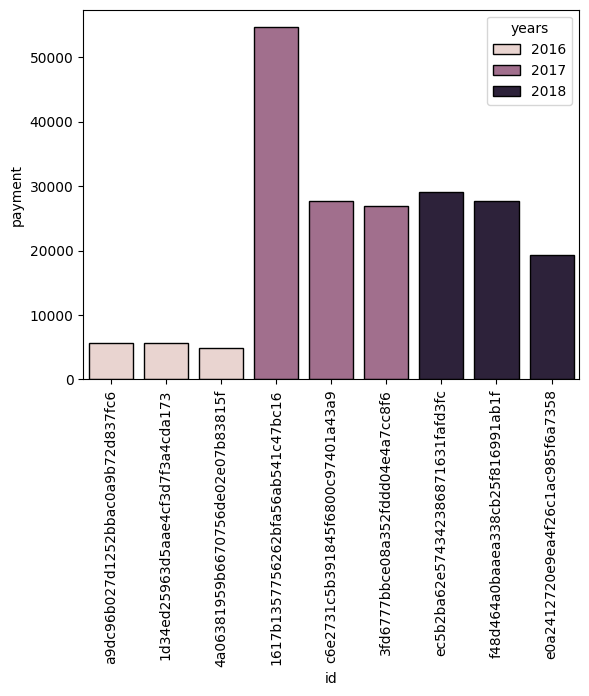

In [15]:
query=""" select years,customer_id,payment,d_rank from 
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value)desc)  d_rank from orders
join payments on payments.order_id=orders.order_id
group by year(orders.order_purchase_timestamp),orders.customer_id)
as a where d_rank<=3"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["years","id","payment","rank"])
sns.barplot(x="id",y="payment",data=df,hue="years",edgecolor="black")
plt.xticks(rotation=90)
plt.show()

### form above chart we observe that in each year top three cusotmers how generate most revenue.

# Conclusion :
from the above analysis we extract the information from various tables in sql, where use sql query for extracting the insights from various tables in ecommerce data base and by using python liabaries show the information with table and create visualization chart. extract insights related to sales and generating revenue from various espects like:
        
    1.Getting most orders from SP state
    2.Number of order receive in perticular year or every year
    3.Most generating revenue from which product category such as bed table bath,HEALTH BEAUTY and computer accessories
    4.Number of customer from each state 
    5.Comparing the sales of two months
    6.Average number of orders recieved by each cities.
    7.Find the corelation between price and product purchase.
    8.Which seller is generating the higher revenue.
    9.year over year growth rate of total sales.
    10.Top three customer of each year.